# final paper advanced quantitative methods

spring summer semester 2018, deadline June 6th, 2018

** Larissa Haas, 1417669 **

In [1]:
library(neuralnet)
#library(rms)
library(devtools)
library(stargazer)
library(RCurl)
library(jsonlite)
library(caret)
library(ggplot2)
library(e1071)
library(h2o)
library(statmod)
library(MASS)
library(corrplot)
library(data.table)
library(ROSE)
library(ggpubr)

Warning message:
"package 'neuralnet' was built under R version 3.4.4"Warning message:
"package 'devtools' was built under R version 3.4.3"
Please cite as: 

 Hlavac, Marek (2015). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2. http://CRAN.R-project.org/package=stargazer 

Loading required package: bitops
Warning message:
"package 'caret' was built under R version 3.4.4"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'e1071' was built under R version 3.4.3"Warning message:
"package 'h2o' was built under R version 3.4.4"
----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

-------------------

In [2]:
PRE <- function(table){
    tp <- table[2,2]
    tn <- table[1,1]
    fp <- table[2,1]
    fn <- table[1,2]
    PCP <- (tp + tn)/(tp + tn + fp + fn)
    PMC <- max(tp + fn, tn + fp)/(tp + tn + fp + fn)
    result <- (PCP - PMC)/(1 - PMC)
    return(result)
}

In [3]:
F1 <- function(table){
    tp <- table[2,2]
    tn <- table[1,1]
    fp <- table[2,1]
    fn <- table[1,2]
    precision <- tp / (tp + fp)
    recall <- tp / (tp + fn)
    result <- (2 * precision * recall) / (precision + recall)
    return(result)
}

In [4]:
ACC <- function(table){
    tp <- table[2,2]
    tn <- table[1,1]
    fp <- table[2,1]
    fn <- table[1,2]
    acc <- (tn + tp) / (tn + tp + fn + fp)
    return(acc)
}

In [8]:
ess1 <- read.table("C:/Users/laris/Desktop/MMDS/Semester3-FSS2018/Advanced-Quantitative-Methods/paper/ess1_with-vars-nolabel.csv", header=TRUE, sep=",") 

In [9]:
ess6 <- read.table("C:/Users/laris/Desktop/MMDS/Semester3-FSS2018/Advanced-Quantitative-Methods/paper/ess6_with-vars-nolabel.csv", header=TRUE, sep=",") 

In [10]:
ess1$round1 = 1
ess6$round1 = 0

In [11]:
data <- rbind(ess1, ess6)

In [12]:
dim(data)

[1] 97032    25

In [26]:
data.complete <- data

In [27]:
for(i in c(4,5,6,10,11,12,13,14,15,16,17,18,19,20,21,22,23)){
    data.complete[is.na(data.complete[,i]), i] <- mean(data.complete[,i], na.rm = TRUE)
}

In [28]:
data.complete[is.na(data.complete[,3]), 3] <- 1
data.complete[is.na(data.complete[,7]), 7] <- 1
data.complete[is.na(data.complete[,8]), 8] <- 0
data.complete[is.na(data.complete[,9]), 9] <- 0

In [41]:
data.scaled <- cbind(data.complete[c(1, 3, 7, 8, 9, 25)], scale(data.complete[-c(1, 2, 3, 7, 8, 9, 24, 25)]))

In [42]:
head(data.scaled)

volact,female,married,children,houseperson,round1,yrbrn,eduyrs,domicil,wkhtot,...,tolerance,self_realisation,solidarity,tvpol,tvtot,political_interest,trust_exe,trust_leg,trstep,stfdem
0,0,1,0,0,1,-0.61141288,-0.3072224,0.1077504,0.5011791,...,-0.5835461,1.1026080,1.2495466,-0.68740222,-1.5914072,-0.4150452,1.833276856,0.24354749,0.0000000,1.1026226
1,0,0,1,0,1,-0.39938084,0.4384014,0.1077504,1.3490377,...,-0.5835461,1.1026080,-1.8227924,0.02639567,-0.6221735,1.7828335,0.409584737,-1.68054070,-1.9123507,-0.1206780
0,1,1,0,0,1,-1.08848498,-0.8043049,0.1077504,0.1055117,...,0.3701569,-0.7954018,0.2254336,0.74019355,1.3162940,0.6838942,0.206200149,0.02975992,1.0666420,-0.1206780
1,0,1,1,0,1,-0.08133278,1.4325664,0.1077504,0.2185595,...,1.3238599,-0.7954018,-1.8227924,-0.68740222,-1.5914072,0.6838942,1.629892267,0.88491023,1.0666420,0.6948557
1,1,0,0,0,1,0.07769126,0.6869427,0.1077504,-0.9119187,...,1.3238599,1.1026080,1.2495466,-1.40120010,-2.0760240,-0.4150452,0.002815561,0.45733507,-0.2100691,0.6948557
0,1,0,1,0,1,-1.08848498,-0.3072224,0.1077504,-0.3466796,...,-2.4909521,1.1026080,-0.7986794,2.88158720,0.8316771,1.7828335,0.002815561,-1.68054070,-1.0612099,-2.1595125


In [31]:
write.csv(data.complete, file = "ess-complete.csv")

In [43]:
write.csv(data.scaled, file = "ess-scaled.csv")

## ab hier weiter machen, vorher Datensatz erstellen

In [5]:
data.scaled <- read.table("ess-scaled.csv", header=TRUE, sep=",")
data.scaled <- data.scaled[,-1]

In [6]:
head(data.scaled)

volact,female,married,children,houseperson,round1,yrbrn,eduyrs,domicil,wkhtot,...,tolerance,self_realisation,solidarity,tvpol,tvtot,political_interest,trust_exe,trust_leg,trstep,stfdem
0,0,1,0,0,1,-0.61141288,-0.3072224,0.1077504,0.5011791,...,-0.5835461,1.1026080,1.2495466,-0.68740222,-1.5914072,-0.4150452,1.833276856,0.24354749,0.0000000,1.1026226
1,0,0,1,0,1,-0.39938084,0.4384014,0.1077504,1.3490377,...,-0.5835461,1.1026080,-1.8227924,0.02639567,-0.6221735,1.7828335,0.409584737,-1.68054070,-1.9123507,-0.1206780
0,1,1,0,0,1,-1.08848498,-0.8043049,0.1077504,0.1055117,...,0.3701569,-0.7954018,0.2254336,0.74019355,1.3162940,0.6838942,0.206200149,0.02975992,1.0666420,-0.1206780
1,0,1,1,0,1,-0.08133278,1.4325664,0.1077504,0.2185595,...,1.3238599,-0.7954018,-1.8227924,-0.68740222,-1.5914072,0.6838942,1.629892267,0.88491023,1.0666420,0.6948557
1,1,0,0,0,1,0.07769126,0.6869427,0.1077504,-0.9119187,...,1.3238599,1.1026080,1.2495466,-1.40120010,-2.0760240,-0.4150452,0.002815561,0.45733507,-0.2100691,0.6948557
0,1,0,1,0,1,-1.08848498,-0.3072224,0.1077504,-0.3466796,...,-2.4909521,1.1026080,-0.7986794,2.88158720,0.8316771,1.7828335,0.002815561,-1.68054070,-1.0612099,-2.1595125


In [6]:
smp_size <- floor(0.9 * nrow(data.scaled))
set.seed(123)
train_ind <- sample(seq_len(nrow(data.scaled)), size = smp_size)
train <- data.scaled[train_ind,]
test <- data.scaled[-train_ind,]

In [7]:
train.bal <- ovun.sample(volact ~ ., data = train, method = "over", N = 114264)$data

## hier beginnt der Teil aus dem Tut

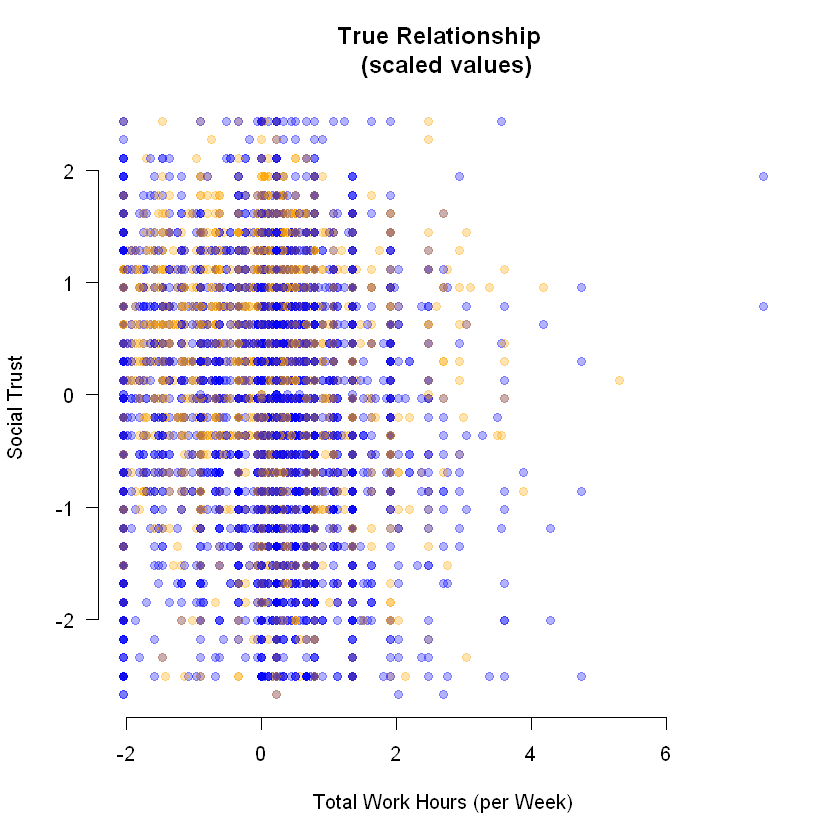

In [35]:
col <- test$volact
col[test$volact == 1] <- adjustcolor("orange", alpha = 0.3)
col[test$volact == 0] <- adjustcolor("blue", alpha = 0.3)

plot(test$wkhtot, test$social_trust, col = col, pch = 19,
     main = "True Relationship \n (scaled values)",
     bty = "n", las = 1,
     xlab = "Total Work Hours (per Week)", ylab = "Social Trust")

In [8]:
ll_logit <- function(theta, y, X) {
    
  # theta consists merely of beta (dim is ncol(X))
    beta <- theta[1:ncol(X)]
    # linear predictor; make sure that X is stored as.matrix
    mu <- X %*% beta
    # response function
    p <- 1/(1 + exp(-mu))
    # log-likelihood
    ll <- y * log(p) + (1 - y) * log(1 - p)
    # sum
    ll <- sum(ll)
    return(ll)
}

In [49]:
y <- test$volact
X <- cbind(1, test$wkhtot, test$social_trust)

startvals <- c(0, 0, 0)

res <- optim(par = startvals,fn = ll_logit, y = y, X = X,
              control = list(fnscale = -1),
              method = "BFGS"
              ) 

mu <- X %*% res$par

p <- 1/(1 + exp(-mu))

y_hat <- rbinom(nrow(p), 1, p)
col <- y_hat
col[y_hat == 1] <- adjustcolor("orange", alpha = 0.3)
col[y_hat == 0] <- adjustcolor("blue", alpha = 0.3)

#plot(test$wkhtot, test$social_trust, col = col, pch = 19,
#      main = "True Relationship",
#     bty = "n", las = 1,
#     xlab = "x1", ylab = "x2")

In [14]:
logit_pred <- table(y_hat, test$volact)
logit_pred

     
y_hat    0    1
    0 4068 2168
    1 2206 1262

In [12]:
ll_simple_nn <- function(theta, y, X){
  
  gamma <- theta[1:4]
  beta_neuron1 <- theta[5:7]
  beta_neuron2 <- theta[8:10]
  beta_neuron3 <- theta[11:13]
  
  mu_neuron1 <- X %*% beta_neuron1
  mu_neuron2 <- X %*% beta_neuron2
  mu_neuron3 <- X %*% beta_neuron3
  
  logitResponse <- function(mu) 1 / (1+exp(-mu))
  
  p_neuron1 <- logitResponse(mu_neuron1)
  p_neuron2 <- logitResponse(mu_neuron2)
  p_neuron3 <- logitResponse(mu_neuron3)
  
  Z <- cbind(1, p_neuron1, p_neuron2, p_neuron3)
  
  mu <- Z %*% gamma
  
  p <- logitResponse(mu)
  
  ll <- y * log(p) + (1 - y) * log(1 - p)
  
  ll <- sum(ll)
  return(ll)
}

In [15]:
# initial values
startvals <- rnorm(13)

ll_simple_nn(startvals, y, X)

# optimize
resNN <- optim(par = startvals, fn = ll_simple_nn, y = y, X = X,
              control = list(fnscale = -1),
              hessian = F,
              method = "BFGS"
              ) 

resNN$par

gammaEst <- resNN$par[1:4]
beta_neuron1Est <- resNN$par[5:7]
beta_neuron2Est <- resNN$par[8:10]
beta_neuron3Est <- resNN$par[11:13]

[1] -6978.911

[1] -6.15666576  6.58043103 -0.46188008 -2.09628366  7.70982166  1.93538161
 [7] -1.22862045  1.08669559 20.64081832 -0.03353229 -0.83308986 -0.26279548
[13] -0.95803953

In [16]:
mu_neuron1Est <- X %*% beta_neuron1Est
mu_neuron2Est <- X %*% beta_neuron2Est
mu_neuron3Est <- X %*% beta_neuron3Est

In [17]:
logitResponse <- function(mu) 1/(1+exp(-mu))

p_neuron1Est <- logitResponse(mu_neuron1Est)
p_neuron2Est <- logitResponse(mu_neuron2Est)
p_neuron3Est <- logitResponse(mu_neuron3Est)

In [18]:
Z <- cbind(1, p_neuron1Est, p_neuron2Est, p_neuron3Est )

mu <- Z %*% gammaEst

In [19]:
p <- logitResponse(mu)


y_hat <- rbinom(nrow(p),1,p)
col <- y_hat

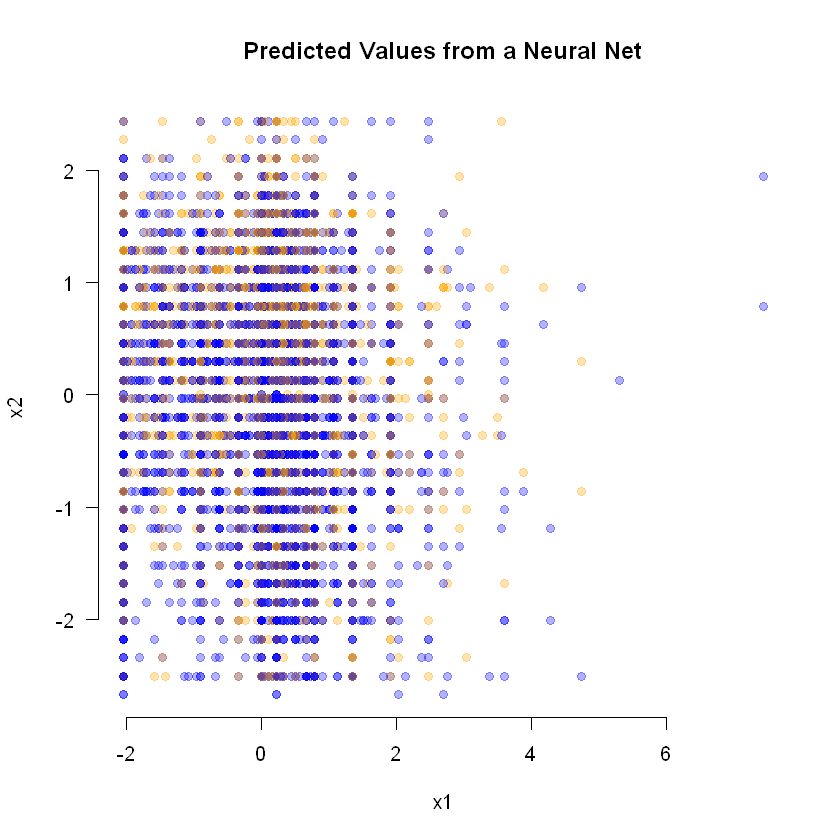

In [47]:
col[y_hat == 1] <- adjustcolor("orange", alpha = 0.3)
col[y_hat == 0] <- adjustcolor("blue", alpha = 0.3)

plot(X[, 2], X[, 3], col = col, pch = 19,
     main = "Predicted Values from a Neural Net",
     bty = "n", las = 1,
     xlab = "x1", ylab = "x2")

In [20]:
nn_pred <- table(y_hat, test$volact)
nn_pred

     
y_hat    0    1
    0 4128 2148
    1 2146 1282

In [21]:
m <- neuralnet(volact ~ wkhtot + social_trust, 
              train, hidden = 1)

In [22]:
p <- compute(m, test[,c(11, 14)])

In [23]:
predictions <- p$net.result

In [24]:
result_test <- rbinom(nrow(predictions),1,predictions)
result3 <- ifelse(predictions >= 0.3, 1, 0)
result2 <- ifelse(predictions >= 0.2, 1, 0)
result4 <- ifelse(predictions >= 0.4, 1, 0)

In [25]:
print(cor(result_test, test$volact))

[1] 0.0153873331


In [26]:
prenn_pred <- table(result_test, test$volact)
prenn_pred

           
result_test    0    1
          0 4124 2202
          1 2150 1228

In [27]:
png("basic_nn.png", width = 800, height = 600)
plot.nnet(m)
dev.off()

Loading required package: scales
Warning message:
"package 'scales' was built under R version 3.4.4"Loading required package: reshape
Warning message:
"package 'reshape' was built under R version 3.4.3"

png 
  2

In [30]:
PRE(nn_pred)
PRE(logit_pred)
PRE(prenn_pred)
PRE(table(result2, test$volact))
PRE(table(result3, test$volact))
PRE(table(result4, test$volact))

[1] 0.3155881415

[1] 0.3028371055

[1] 0.3063436404

[1] 0.01721389863

[1] 0.2312719158

[1] 0.3927319095

In [31]:
F1(nn_pred)
F1(logit_pred)
F1(prenn_pred)
F1(table(result2, test$volact))
F1(table(result3, test$volact))
F1(table(result4, test$volact))

[1] 0.3738699329

[1] 0.3659031603

[1] 0.3607520564

[1] 0.5241549622

[1] 0.5232776515

[1] 0.4145666872

## logistic regression

In [95]:
y <- train$volact
X <- as.matrix(cbind(1, train[,-1]))

In [96]:
startvals <- c(rep(0, 23))
res <- optim(par = startvals,fn = ll_logit, y = y, X = X,
              control = list(fnscale = -1),
              method = "BFGS"
              ) 

In [97]:
mu <- as.matrix(cbind(1, test[,-1])) %*% res$par
p <- 1/(1 + exp(-mu))
y_hat <- rbinom(nrow(p), 1, p)

In [108]:
table(y_hat, test$volact)
ACC(table(y_hat, test$volact))
PRE(table(y_hat, test$volact))
F1(table(y_hat, test$volact))

     
y_hat    0    1
    0 4256 2037
    1 2018 1393

[1] 0.5821311

[1] -0.1822157

[1] 0.4072504

In [102]:
y_hat1 <- ifelse(p > 0.1, 1, 0)
y_hat2 <- ifelse(p > 0.2, 1, 0)
y_hat3 <- ifelse(p > 0.3, 1, 0)
y_hat4 <- ifelse(p > 0.4, 1, 0)
y_hat5 <- ifelse(p > 0.5, 1, 0)
y_hat6 <- ifelse(p > 0.6, 1, 0)
y_hat7 <- ifelse(p > 0.7, 1, 0)
y_hat8 <- ifelse(p > 0.8, 1, 0)
y_hat9 <- ifelse(p > 0.9, 1, 0)

In [107]:
head(y_hat9)

6,0
11,0
31,0
32,0
37,0
38,0


In [112]:
threshold <- cbind(seq(0.1, 0.8, length.out = 8),
    
c(ACC(table(y_hat1, test$volact)),
ACC(table(y_hat2, test$volact)),
ACC(table(y_hat3, test$volact)),
ACC(table(y_hat4, test$volact)),
ACC(table(y_hat5, test$volact)),
ACC(table(y_hat6, test$volact)),
ACC(table(y_hat7, test$volact)),
ACC(table(y_hat8, test$volact))),
#ACC(table(y_hat9, test$volact))),

c(PRE(table(y_hat1, test$volact)),
PRE(table(y_hat2, test$volact)),
PRE(table(y_hat3, test$volact)),
PRE(table(y_hat4, test$volact)),
PRE(table(y_hat5, test$volact)),
PRE(table(y_hat6, test$volact)),
PRE(table(y_hat7, test$volact)),
PRE(table(y_hat8, test$volact))),
#PRE(table(y_hat9, test$volact))),

c(F1(table(y_hat1, test$volact)),
F1(table(y_hat2, test$volact)),
F1(table(y_hat3, test$volact)),
F1(table(y_hat4, test$volact)),
F1(table(y_hat5, test$volact)),
F1(table(y_hat6, test$volact)),
F1(table(y_hat7, test$volact)),
F1(table(y_hat8, test$volact))))
#F1(table(y_hat9, test$volact))))

In [113]:
max(threshold[,2])

[1] 0.6812655

png 
  2

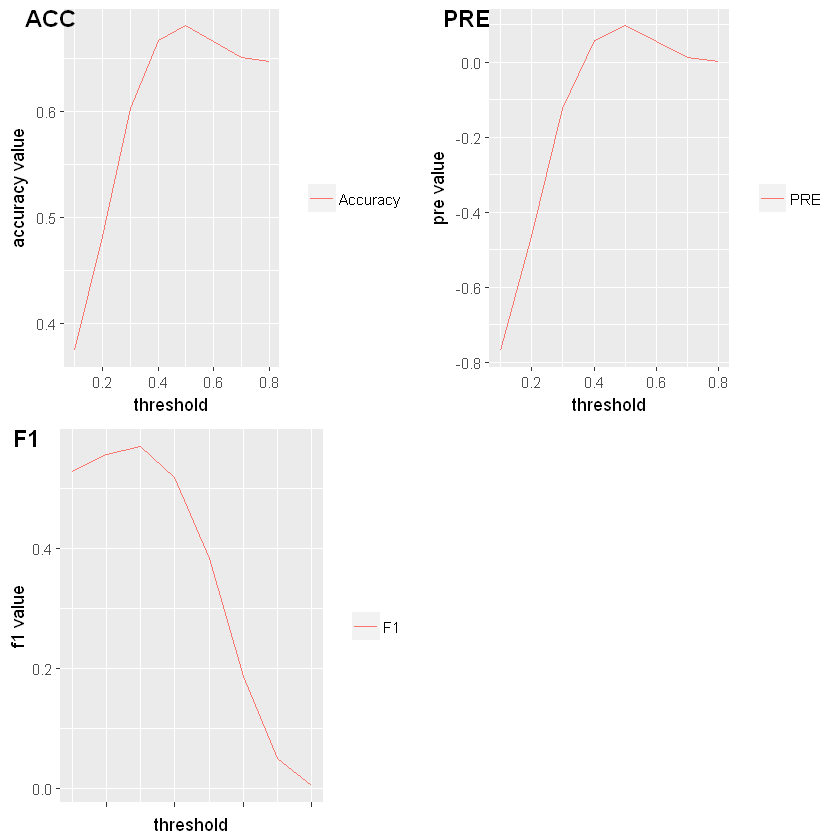

In [114]:
acc <- ggplot(data.frame(threshold),aes(threshold[,1],threshold[,2]))+geom_line(aes(color="Accuracy"))+
    labs(color=" ") + 
    ylab("accuracy value") + xlab("threshold")
pre <- ggplot(data.frame(threshold),aes(threshold[,1],threshold[,3]))+geom_line(aes(color="PRE"))+
    labs(color=" ") + 
    ylab("pre value") + xlab("threshold")
f1 <- ggplot(data.frame(threshold),aes(threshold[,1],threshold[,4]))+geom_line(aes(color="F1"))+
    labs(color=" ") + 
    ylab("f1 value") + xlab("threshold")
png("evaluation_log_threshold_unbal.png") 
myplot <- ggarrange(acc, pre, f1 + rremove("x.text"), 
          labels = c("ACC", "PRE", "F1"),
          ncol = 2, nrow = 2)
print(myplot)
dev.off()
print(myplot)

In [115]:
y.bal <- train.bal$volact
X.bal <- as.matrix(cbind(1, train.bal[,-1]))

In [86]:
startvals <- c(rep(0, 23))
res <- optim(par = startvals,fn = ll_logit, y = y.bal, X = X.bal,
              control = list(fnscale = -1), hessian = TRUE,
              method = "BFGS"
              ) 

In [87]:
mu <- as.matrix(cbind(1, test[,-1])) %*% res$par

p <- 1/(1 + exp(-mu))

y_hat.bal <- rbinom(nrow(p), 1, p)

In [16]:
table(y_hat.bal, test$volact)
ACC(table(y_hat.bal, test$volact))
PRE(table(y_hat.bal, test$volact))
F1(table(y_hat.bal, test$volact))

         
y_hat.bal    0    1
        0 3399 1588
        1 2875 1842

[1] 0.5400866

[1] -0.3011662

[1] 0.452191

In [88]:
y_hat1 <- ifelse(p > 0.1, 1, 0)
y_hat2 <- ifelse(p > 0.2, 1, 0)
y_hat3 <- ifelse(p > 0.3, 1, 0)
y_hat4 <- ifelse(p > 0.4, 1, 0)
y_hat5 <- ifelse(p > 0.5, 1, 0)
y_hat6 <- ifelse(p > 0.6, 1, 0)
y_hat7 <- ifelse(p > 0.7, 1, 0)
y_hat8 <- ifelse(p > 0.8, 1, 0)
y_hat9 <- ifelse(p > 0.9, 1, 0)

In [89]:
threshold <- cbind(seq(0.1, 0.9, length.out = 9),
    
c(ACC(table(y_hat1, test$volact)),
ACC(table(y_hat2, test$volact)),
ACC(table(y_hat3, test$volact)),
ACC(table(y_hat4, test$volact)),
ACC(table(y_hat5, test$volact)),
ACC(table(y_hat6, test$volact)),
ACC(table(y_hat7, test$volact)),
ACC(table(y_hat8, test$volact)),
ACC(table(y_hat9, test$volact))),

c(PRE(table(y_hat1, test$volact)),
PRE(table(y_hat2, test$volact)),
PRE(table(y_hat3, test$volact)),
PRE(table(y_hat4, test$volact)),
PRE(table(y_hat5, test$volact)),
PRE(table(y_hat6, test$volact)),
PRE(table(y_hat7, test$volact)),
PRE(table(y_hat8, test$volact)),
PRE(table(y_hat9, test$volact))),

c(F1(table(y_hat1, test$volact)),
F1(table(y_hat2, test$volact)),
F1(table(y_hat3, test$volact)),
F1(table(y_hat4, test$volact)),
F1(table(y_hat5, test$volact)),
F1(table(y_hat6, test$volact)),
F1(table(y_hat7, test$volact)),
F1(table(y_hat8, test$volact)),
F1(table(y_hat9, test$volact))))

In [90]:
max(threshold[,2])

[1] 0.6785862

png 
  2

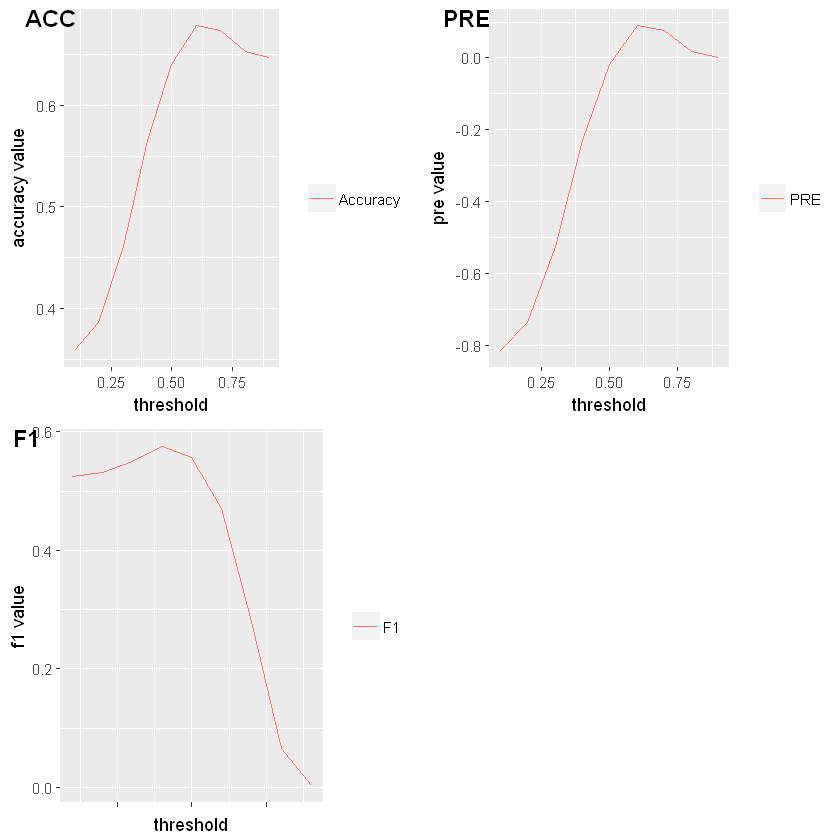

In [94]:
acc <- ggplot(data.frame(threshold),aes(threshold[,1],threshold[,2]))+geom_line(aes(color="Accuracy"))+
    labs(color=" ") + 
    ylab("accuracy value") + xlab("threshold")
pre <- ggplot(data.frame(threshold),aes(threshold[,1],threshold[,3]))+geom_line(aes(color="PRE"))+
    labs(color=" ") + 
    ylab("pre value") + xlab("threshold")
f1 <- ggplot(data.frame(threshold),aes(threshold[,1],threshold[,4]))+geom_line(aes(color="F1"))+
    labs(color=" ") + 
    ylab("f1 value") + xlab("threshold")
png("evaluation_log_threshold_bal.png") 
myplot <- ggarrange(acc, pre, f1 + rremove("x.text"), 
          labels = c("ACC", "PRE", "F1"),
          ncol = 2, nrow = 2)
print(myplot)
dev.off()
print(myplot)

In [21]:
#ols_model <- glm(y ~ X[,-c(1)], family=binomial(link='logit'))

In [22]:
#stargazer(ols_model)

## marginal effects

In [52]:
range <- seq(-4, 2, length.out = 20)
sel <- 7
plot.data <- matrix(NA, nrow = length(range), ncol = ncol(test[,-1]))
for(i in 1:ncol(test[,-1])){
    plot.data[,i] <- mean(test[,i])
}
for(i in 1:length(range)){
    plot.data[i, sel] <- range[i]
}

In [50]:
mu <- as.matrix(cbind(1, plot.data)) %*% res$par
p <- 1/(1 + exp(-mu))

In [51]:
df <- data.frame(cbind(range, p))

png 
  2

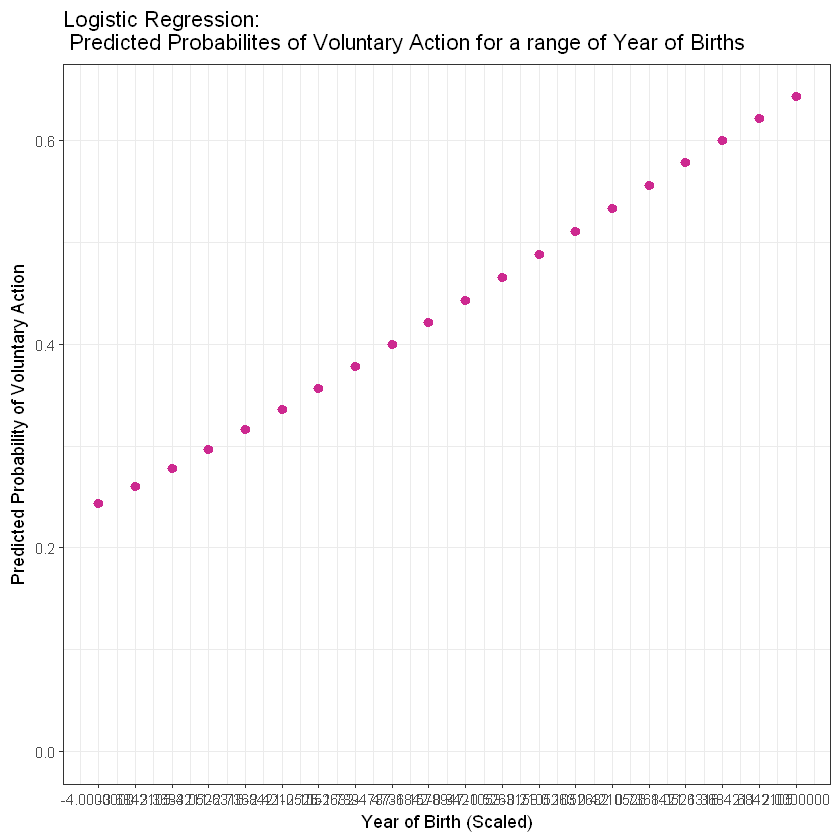

In [53]:
png("log-age-volact.png")
myplot <- ggplot(df,aes(x = df[,1], y = df[,2], ymin = 0, ymax = 0)) + 
    geom_pointrange(col = "maroon3") + 
    ylab("Predicted Probability of Voluntary Action") + 
    xlab("Year of Birth (Scaled)") + 
    ggtitle("Logistic Regression: \n Predicted Probabilites of Voluntary Action for a range of Year of Births") + 
    scale_x_continuous(breaks = range) + 
    theme_bw() 
print(myplot)
dev.off()
print(myplot)

## hier beginnen die NN modelle

In [90]:
m <- neuralnet(volact ~ sclmeet, 
              train, hidden = 1)

In [91]:
p <- compute(m, test[,13])

In [92]:
predictions <- p$net.result

In [93]:
print(cor(predictions, test$volact))

             [,1]
[1,] 0.1504734077


In [94]:
result <- ifelse(predictions >= 0.3, 1, 0)
F1(table(result, test$volact))
PRE(table(result, test$volact))

[1] 0.5337164407

[1] 0.1722983742

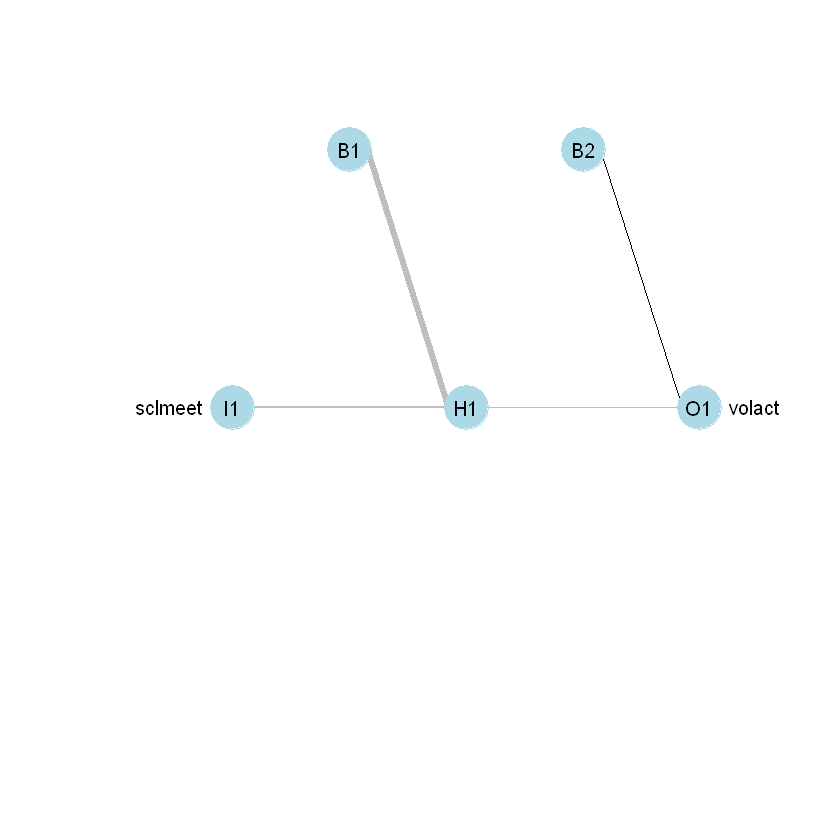

In [95]:
plot.nnet(m)

In [34]:
m2 <- neuralnet(volact ~ sclmeet + social_trust + tolerance + self_realisation + solidarity, 
              train, hidden = 2)

In [35]:
p2 <- compute(m2, test[,c(13, 14, 15, 16, 17)])

In [36]:
predictions2 <- p2$net.result

In [37]:
print(cor(predictions2, test$volact))

             [,1]
[1,] 0.2191669913


In [41]:
result3 <- ifelse(predictions2 >= 0.3, 1, 0)
result2 <- ifelse(predictions2 >= 0.2, 1, 0)
result4 <- ifelse(predictions2 >= 0.4, 1, 0)

In [51]:
ACC(table(result4, test$volact))
F1(table(result4, test$volact))
PRE(table(result4, test$volact))

[1] 0.624278648

[1] 0.4606508876

[1] 0.4188715333

In [52]:
png("more-complex_nn.png", width = 800, height = 600)
plot.nnet(m2)
dev.off()

png 
  2

In [68]:
m3 <- neuralnet(volact ~ round1 + female + yrbrn + eduyrs + domicil + married + 
               children + houseperson + wkhtot + church + sclmeet + social_trust + 
               tolerance + self_realisation + solidarity + tvpol + tvtot + 
               political_interest + trust_exe + trust_leg + trstep + stfdem, 
               train, hidden = 1)

In [70]:
p3 <- compute(m3, test[,-c(1, 2, 25)])

In [71]:
predictions3 <- p3$net.result

In [72]:
print(cor(predictions3, test$volact))

             [,1]
[1,] 0.3230475632


In [83]:
#library(nnet)
png("total-input_nn.png", width = 800, height = 600)
plot.nnet(m3)
dev.off()

ERROR: Error in plot.nnet(m3): konnte Funktion "plot.nnet" nicht finden


> **under construction** 

> vllt wäre es sinnvoll, solche komplexen modelle dann in keras/tensorflow zu machen

In [ ]:
#m <- neuralnet(volact ~ round1 + female + yrbrn + eduyrs + domicil + married + 
#               children + houseperson + wkhtot + church + sclmeet + social_trust + 
#               tolerance + self_realisation + solidarity + tvpol + tvtot + 
#               political_interest + trust_exe + trust_leg + trstep + stfdem, 
#               train, hidden = 3)

## ab hier mit **keras** und **tensorflow**

In [4]:
library(keras)

Warning message:
"package 'keras' was built under R version 3.4.4"

In [5]:
install_keras()

Using r-tensorflow conda environment for TensorFlow installation

Installation complete.



In [19]:
dim(train)
dim(test)

[1] 87328    23

[1] 9704   23

In [6]:
train.target <- train$volact
test.target <- test$volact

In [7]:
train <- train[,-c(1, 2, 3)]
test <- test[,-c(1, 2, 3)]

In [8]:
model <- keras_model_sequential()

In [77]:
model %>% layer_dense(units = 23, activation = "softmax", input_shape = c(23)) %>% 
    layer_dense(units = 1, activation = "sigmoid")

In [78]:
model %>% compile(
    loss = "mean_squared_error",
    optimizer = "adam",
    metrics = "accuracy")

In [46]:
test.asmatrix <- data.matrix(test)

In [11]:
train.asmatrix <- data.matrix(train)

In [28]:
head(train.asmatrix)

,round1,female,yrbrn,eduyrs,domicil,married,children,houseperson,wkhtot,church,...,self_realisation,solidarity,tvpol,tvtot,political_interest,trust_exe,trust_leg,trstep,stfdem,dweight
27905,1,-1.0754603,-0.08133278,1.18402517,-0.7113997,0.9599234,1.2465789,-0.1840728,0.9533704,0.2417382,...,-0.7954018,-0.7986794,-0.68740222,-0.1375566,0.6838942,0.6129693,-0.1840277,-0.2100691,1.1026226,2.335403e+00
76491,0,0.9305153,-0.77043692,-1.05284615,0.9269004,0.9599234,1.2465789,-0.1840728,0.6707508,1.5369295,...,1.1026080,1.2495466,3.59538508,1.3162940,1.7828335,0.4095847,-1.2529655,-1.0612099,-0.1206780,2.100667e-05
39684,1,-1.0754603,-0.87645294,-1.30138741,0.1077504,0.9599234,-0.8044838,-0.1840728,0.2185595,-0.4058574,...,-0.7954018,-0.7986794,0.02639567,0.3470603,-0.4150452,0.2062001,-0.1840277,-1.0612099,-0.1206780,2.100667e-05
85679,0,0.9305153,-1.14149299,-0.05868112,-1.5305498,-1.0677190,-0.8044838,-0.1840728,0.5011791,-0.4058574,...,0.1536031,0.2254336,0.74019355,1.3162940,0.6838942,-0.2005690,-0.3978152,-1.0612099,-0.1206780,-2.069303e+00
91252,0,0.9305153,1.08484346,0.00000000,0.9269004,-1.0677190,-0.8044838,-0.1840728,0.2185595,-1.0534530,...,0.1536031,0.2254336,0.02639567,-0.6221735,-0.4150452,-0.8107228,-0.3978152,-0.6356395,-0.5284449,2.100667e-05
4421,1,0.9305153,-0.39938084,0.93548391,0.9269004,-1.0677190,-0.8044838,-0.1840728,0.8403225,-1.0534530,...,1.1026080,0.2254336,0.74019355,-0.6221735,1.7828335,-0.2005690,-0.1840277,-0.6356395,1.1026226,1.492933e-01


In [79]:
history <- model %>% fit(
    train.asmatrix,
    train.target,
    epochs = 100,
    batch_size = 900,
    validation_split = 0.2,
    verbose = 1)

In [54]:
plot(history, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB')

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): kann png()-Gerät nicht starten


plot without title

In [75]:
classes <- model %>% predict_classes(test.asmatrix, batch_size = 128)

In [76]:
table(test.target, classes)

           classes
test.target    0
          0 6274
          1 3430

In [73]:
score <- model %>% evaluate(test.asmatrix, test.target, batch_size = 1000)
print(score)

$loss
[1] 0.6497262

$acc
[1] 0.6465375

